In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import xgboost as xgb
import shap
from scipy.stats import norm

In [2]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB

In [3]:
random.seed(2022)

In [4]:
AML = pd.read_excel('AML and ATF Modelling Assignment data_std.xlsx', sheet_name='data')

In [5]:
AML.head()

,cust_tenure,cust_cdn_resident,prod_sav,prod_primary_sav_cnt,prod_cda,prod_primary_cda_cnt,prod_mor,prod_primary_mor_cnt,prod_llc,prod_primary_llc_cnt,...,acct_type_num,tot_acct_num.1,tot_cross_border_val_12m,tot_cash_val_5m,tot_cross_border_cnt_12m,tot_cash_cnt_5m,avg_cash_5m,avg_wire_12m,cust_id_masked,rating
0,-1.024753,0.231869,-0.827535,-0.677491,-1.187365,-0.989953,-0.391077,-0.324689,1.840668,1.333540,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,004f8eab603ba30ea8fffd64ef39d5a990aff66b35f447...,0
1,-0.802710,-4.312772,1.208408,0.548246,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.175843,-0.484331,-0.128725,0.027173,-0.291457,-0.576554,1.707971,-0.140963,00a38e35a8350be0d0d2ef2c7c40de54f049ff8359b54e...,1
2,-0.893597,0.231869,-0.827535,-0.677491,-1.187365,-0.989953,-0.391077,-0.324689,1.840668,1.333540,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,00d442a125b121bcd9e17ae58fdce2e7ae3513375afb2a...,0
3,-0.742306,0.231869,1.208408,0.548246,-1.187365,-0.989953,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,0114b5ce76aa3c09c460620cc19f1a77087ede3c326021...,0
4,0.574287,0.231869,-0.827535,-0.677491,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.874462,-0.784422,-0.128725,-0.081122,-0.291457,0.718380,-0.142708,-0.140963,015a0ba1cb86c4e46bb01f8ed501254cfb7422e240583f...,0


In [6]:
#Checking Missing or NaN Values
AML.isnull().sum()

cust_tenure             0
cust_cdn_resident       0
prod_sav                0
prod_primary_sav_cnt    0
prod_cda                0
                       ..
tot_cash_cnt_5m         0
avg_cash_5m             0
avg_wire_12m            0
cust_id_masked          0
rating                  0
Length: 152, dtype: int64

In [7]:
list(AML.columns[AML.isnull().any()])

[]

In [8]:
AML.describe()

,cust_tenure,cust_cdn_resident,prod_sav,prod_primary_sav_cnt,prod_cda,prod_primary_cda_cnt,prod_mor,prod_primary_mor_cnt,prod_llc,prod_primary_llc_cnt,...,max_acct_num,acct_type_num,tot_acct_num.1,tot_cross_border_val_12m,tot_cash_val_5m,tot_cross_border_cnt_12m,tot_cash_cnt_5m,avg_cash_5m,avg_wire_12m,rating
count,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,...,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,588.000000
mean,-3.318396e-17,-2.513107e-16,-5.777691e-17,-1.299036e-16,-1.125328e-16,8.685418e-18,-2.749124e-16,-1.691768e-16,-1.400996e-16,4.418234e-17,...,-4.663692e-17,4.135014e-17,1.496347e-17,-2.115655e-16,5.456708e-17,-6.683996e-17,5.607759e-17,4.805302e-17,8.185063e-17,0.336735
std,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,...,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,0.472996
min,-1.038455e+00,-4.312772e+00,-8.275347e-01,-6.774907e-01,-1.187365e+00,-9.899530e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-1.261487e+00,-1.573081e+00,-1.084513e+00,-1.287247e-01,-3.784918e-01,-2.914573e-01,-8.355407e-01,-4.002812e-01,-1.409628e-01,0.000000
25%,-8.234744e-01,2.318694e-01,-8.275347e-01,-6.774907e-01,-1.187365e+00,-9.899530e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-6.021500e-01,-8.744621e-01,-7.844219e-01,-1.287247e-01,-3.784918e-01,-2.914573e-01,-8.355407e-01,-4.002812e-01,-1.409628e-01,0.000000
50%,-4.450379e-01,2.318694e-01,-8.275347e-01,-6.774907e-01,8.422009e-01,2.978620e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-6.021500e-01,-1.758429e-01,-1.842396e-01,-1.287247e-01,-3.200575e-01,-2.914573e-01,-4.470605e-01,-2.928083e-01,-1.409628e-01,0.000000
75%,6.744713e-01,2.318694e-01,1.208408e+00,5.482463e-01,8.422009e-01,2.978620e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,5.718743e-02,5.227763e-01,4.159426e-01,-1.287247e-01,-8.232960e-03,-2.914573e-01,6.212600e-01,2.436413e-02,-1.409628e-01,1.000000
max,3.090299e+00,2.318694e-01,1.208408e+00,5.451195e+00,8.422009e-01,4.161307e+00,2.557042e+00,8.514069e+00,1.840668e+00,4.989118e+00,...,7.309899e+00,2.618634e+00,6.117674e+00,1.406890e+01,1.426850e+01,9.874967e+00,4.732675e+00,1.165024e+01,1.561887e+01,1.000000


In [9]:
AML['rating'].value_counts(), AML['cust_tenure'].value_counts(), AML['cust_cdn_resident'].value_counts()

(0    390
 1    198
 Name: rating, dtype: int64,
 -0.823964    21
  1.820967     7
 -0.823405     6
  1.711344     6
 -0.823684     6
              ..
 -0.950366     1
 -0.564169     1
  1.555020     1
 -0.311365     1
 -0.078417     1
 Name: cust_tenure, Length: 492, dtype: int64,
  0.231869    558
 -4.312772     30
 Name: cust_cdn_resident, dtype: int64)

In [10]:
AML.nunique()

cust_tenure             492
cust_cdn_resident         2
prod_sav                  2
prod_primary_sav_cnt      6
prod_cda                  2
                       ... 
tot_cash_cnt_5m          33
avg_cash_5m             354
avg_wire_12m            109
cust_id_masked          588
rating                    2
Length: 152, dtype: int64

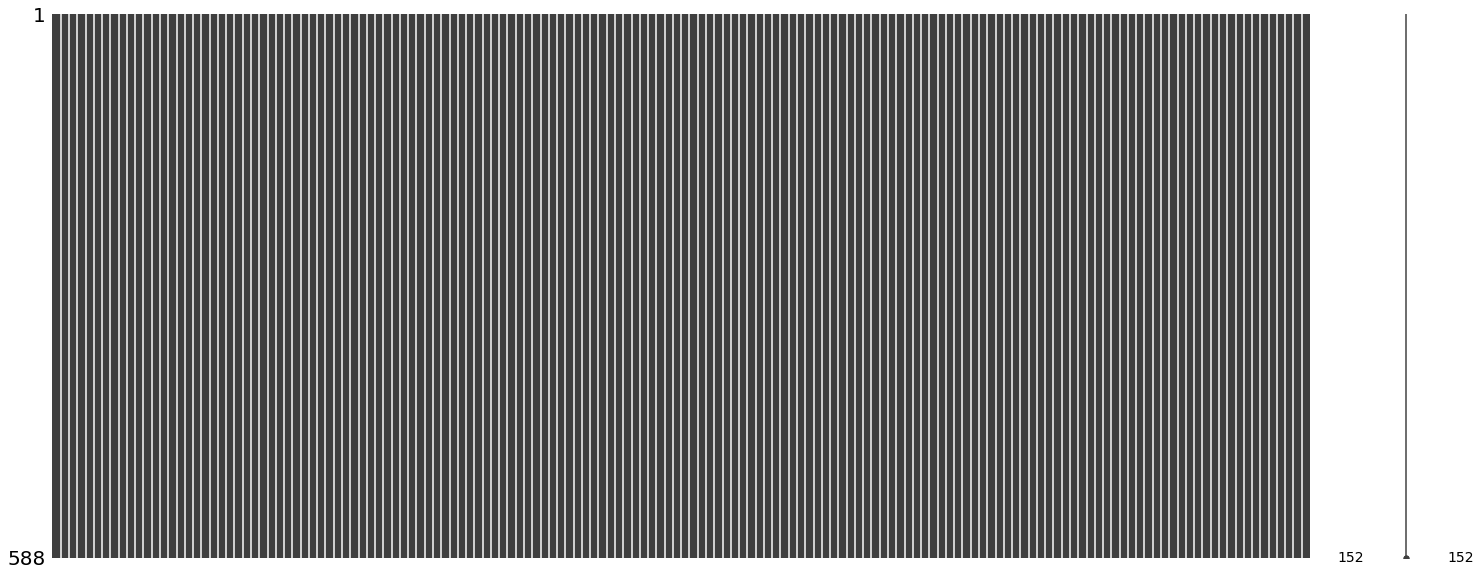

In [11]:
msno.matrix(AML)
plt.show()

# msno.bar(AML)
# plt.show()

### It looks like data is already clean

In [12]:
AML_check = AML.drop(columns=['cust_id_masked'])
AML_check_test = AML.drop(columns=['cust_id_masked','rating'])

In [13]:
y_trains = AML_check['rating']
x_trains = AML_check.drop(columns='rating')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_trains, y_trains, test_size = 0.2, random_state = 2022)

In [15]:
clf = RandomForestClassifier(n_estimators = 100, class_weight="balanced", random_state=2022)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=2022)

In [16]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score:', accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        82
           1       0.79      0.53      0.63        36

    accuracy                           0.81       118
   macro avg       0.81      0.73      0.75       118
weighted avg       0.81      0.81      0.80       118

accuracy score: 0.8135593220338984
auc score:  0.73340108401084


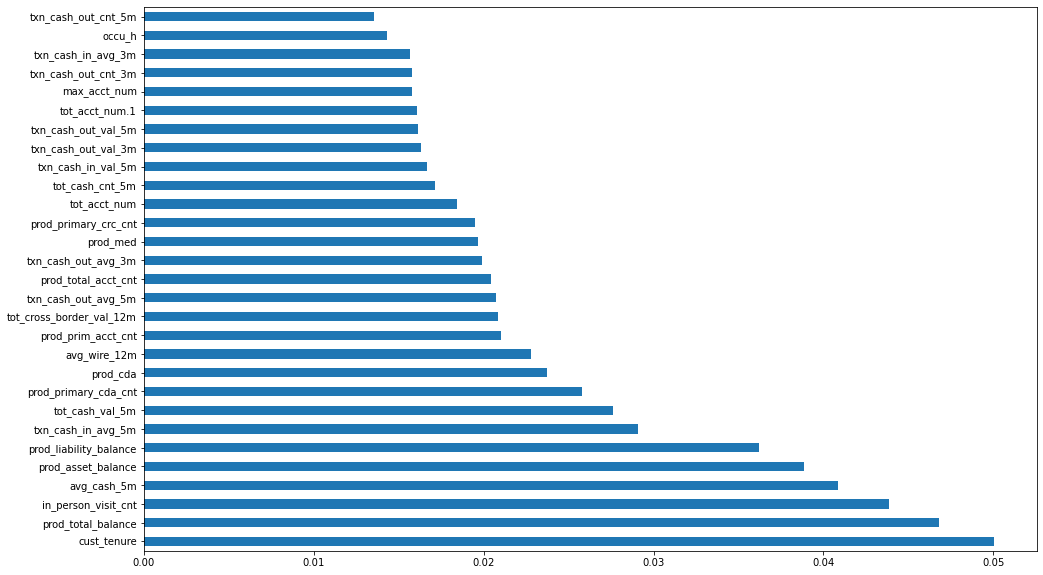

In [17]:
plt.figure(figsize=(16, 10))
# print(model.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(29).plot(kind='barh') 
plt.show()

In [18]:
inertia_arr = []
k_range = range(10, 40)

for k in k_range:
    KM = KMeans(n_clusters=k, random_state=2022, init='k-means++')
    KM.fit(X_train)
    interia = KM.inertia_
    inertia_arr.append(interia)
    
#     print('k: ', k, 'inertia: ', interia)

inertia_arr = np.array(inertia_arr)

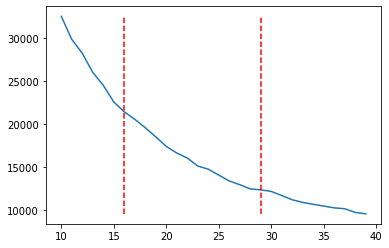

In [19]:
plt.plot(k_range, inertia_arr)
plt.vlines(16, ymin = inertia_arr.min()*0.999, ymax = inertia_arr.max()*1.0003, linestyles = '--', colors = 'r')
plt.vlines(29, ymin = inertia_arr.min()*0.999, ymax = inertia_arr.max()*1.0003, linestyles = '--', colors = 'r')
plt.show()

In [20]:
silhouette_vals = []
for k in range(10, 40):
    KMS = KMeans(n_clusters = k, init = 'k-means++', random_state = 2022)
    pred = KMS.fit_predict(X_train)
    silhouette_vals.append(np.mean(silhouette_samples(X_train, pred, metric = 'euclidean')))

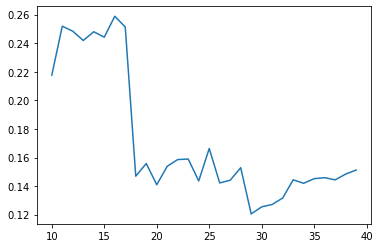

In [21]:
plt.plot(range(10, 40), silhouette_vals)
plt.show()

In [22]:
best_n = -1
best_silhouette_score = -1

for k in range(10, 40):
    kmeans = KMeans(n_clusters = k, random_state = 2022)
    kmeans.fit(X_train)
    clusters = kmeans.predict(X_train)
    
    score = silhouette_score(X_train, clusters)
    print('k: ', k, 'score: ', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n: ', best_n, 'best_score: ', best_silhouette_score)

k:  10 score:  0.21764782001124855
k:  11 score:  0.25189865606780065
k:  12 score:  0.24839507883106404
k:  13 score:  0.24191304204771247
k:  14 score:  0.2480068225385309
k:  15 score:  0.24420753411231708
k:  16 score:  0.25886483267007854
k:  17 score:  0.2513171870370055
k:  18 score:  0.1469264640408109
k:  19 score:  0.15579292828922753
k:  20 score:  0.1409429617732081
k:  21 score:  0.15386915011485233
k:  22 score:  0.1585579995264582
k:  23 score:  0.15893243901005766
k:  24 score:  0.1435739219851979
k:  25 score:  0.16628103276932954
k:  26 score:  0.14219696229216355
k:  27 score:  0.14411259840140894
k:  28 score:  0.1528601340999342
k:  29 score:  0.12051572392394959
k:  30 score:  0.12546693531238967
k:  31 score:  0.1271233831736543
k:  32 score:  0.13166086673000882
k:  33 score:  0.14437559923510404
k:  34 score:  0.1419609328763181
k:  35 score:  0.1451881634754419
k:  36 score:  0.145882905963355
k:  37 score:  0.14435161790772613
k:  38 score:  0.148380552070533

### RandomForestClassifier

In [23]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [1000, 2000, 3000, 4000],
#            'max_depth' : [6, 8],
#            'min_samples_leaf' : [4, 8],
#            'min_samples_split' : [4, 8]
#             }

# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_train, y_train)

# print('Optimal Hyperparameter: ', grid_cv.best_params_)
# print('Max Prediction Accuacry: {:.4f}'.format(grid_cv.best_score_))

In [24]:
# Optimal Hyperparameter:  {'max_depth': 8, 'min_samples_leaf': 4, 'max_samples_split': 4, 'n_estimators': 2000}

In [25]:
clf = RandomForestClassifier(n_estimators = 2000, max_depth = 8, class_weight="balanced", random_state=2022)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score:', accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.77      0.56      0.65        36

    accuracy                           0.81       118
   macro avg       0.80      0.74      0.76       118
weighted avg       0.81      0.81      0.80       118

accuracy score: 0.8135593220338984
auc score:  0.7411924119241193


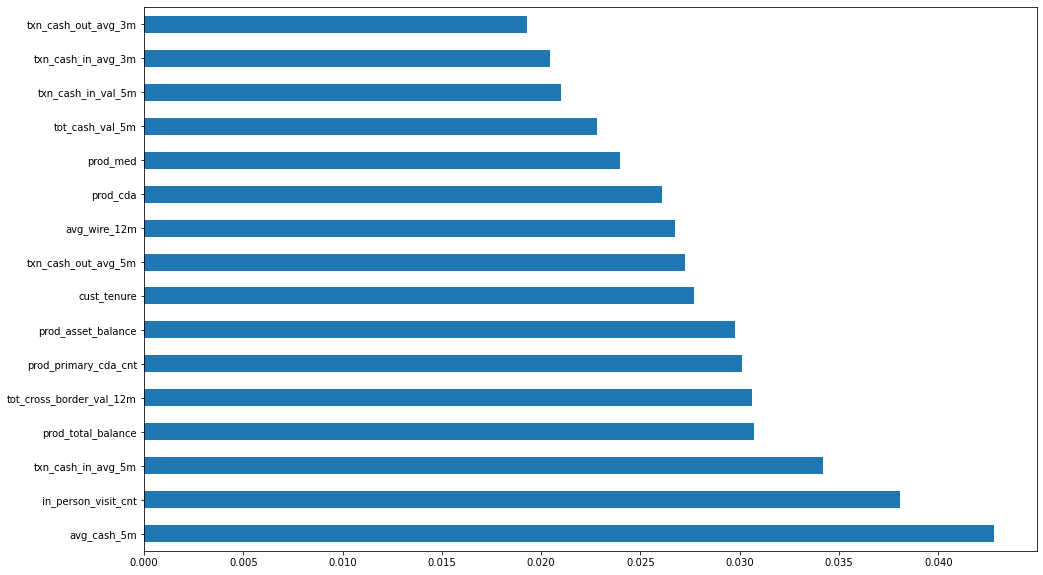

In [26]:
plt.figure(figsize=(16, 10))
# print(model.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(16).plot(kind='barh') 
plt.show()

In [27]:
# feat_importances = pd.DataFrame(feat_importances)
# feat_importances['feat_importances'] = feat_importances.index
# feat_importances = feat_importances.nlargest(29, 0)

### ExtraTreesClassifier

In [28]:
etc_model = ExtraTreesClassifier(n_estimators = 2000, class_weight="balanced", max_depth=8, random_state=2022)
etc_model.fit(X_train, y_train)
#print(etc_model.feature_importances_)
feature_list = pd.concat([pd.Series(AML_check.columns), pd.Series(etc_model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)[:30]

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score:', accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ', metrics.auc(fpr, tpr))


              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.77      0.56      0.65        36

    accuracy                           0.81       118
   macro avg       0.80      0.74      0.76       118
weighted avg       0.81      0.81      0.80       118

accuracy score: 0.8135593220338984
auc score:  0.7411924119241193


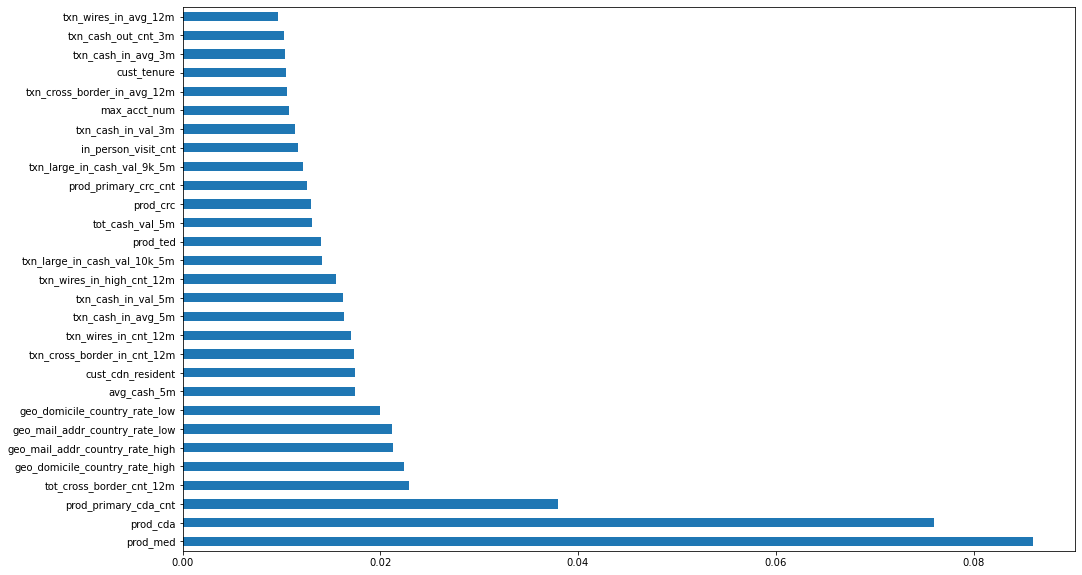

In [29]:
plt.figure(figsize=(16, 10))
feature_list2 = pd.Series(etc_model.feature_importances_, index=X_train.columns)
feature_list2.nlargest(29).plot(kind='barh') 
plt.show()

In [30]:
# x_trains = AML_check[feat_importances['feat_importances']]

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(x_trains, y_trains, test_size = 0.2, random_state = 2022)

In [32]:
# selectK = SelectKBest(score_func=f_classif, k=29)
# X = selectK.fit_transform(X, y)

In [33]:
# from sklearn import svm
# clf = svm.SVC(gamma=0.001, class_weight="balanced", random_state = 2022)
# clf.fit(X_train, y_train)

In [34]:
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))
# print('accuracy score:', accuracy_score(y_test, y_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# print('auc score: ', metrics.auc(fpr, tpr))

In [35]:
# clf = ExtraTreesClassifier(n_estimators = 1000, class_weight="balanced", max_depth=4, random_state = 2022)
# clf.fit(X_train, y_train)

In [36]:
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))
# print('accuracy score:', accuracy_score(y_test, y_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# print('auc score: ', metrics.auc(fpr, tpr))

In [37]:
# clf = GaussianNB()
# clf.fit(X_train, y_train)

In [38]:
# y_pred = nb.predict(X_test)
# print(classification_report(y_test, y_pred))
# print('accuracy score:', accuracy_score(y_test, y_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# print('auc score: ', metrics.auc(fpr, tpr))